### Preprocesamiento de datos para Regresión Logística

Preparar adecuadamente los datos asegura que el modelo que construyas haga predicciones precisas y significativas. En este caso, estamos trabajando con un dataset que contiene indicadores de salud para predecir la presencia de diabetes.

#### Carga del Dataset

In [42]:
import pandas as pd
import sklearn as skl

path = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

dataframe = pd.read_csv(path)
print(dataframe)

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0 

#### Exploración Inicial de los Datos

In [43]:
print(dataframe.describe())

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

El método describe de pandas proporciona un resumen estadístico de las características numéricas en el DataFrame.

#### Estandarización de los Datos

In [44]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas numéricas (En este caso)
features = dataframe.columns 

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
dataframe_scaled = scaler.fit_transform(dataframe[features])

# Crear un DataFrame con los datos escalados
dataframe_scaled = pd.DataFrame(dataframe_scaled, columns=features)

print(dataframe_scaled.describe())

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  7.069200e+04  7.069200e+04  7.069200e+04   
mean          0.000000  1.286560e-17 -9.649197e-17  2.106741e-16   
std           1.000007  1.000007e+00  1.000007e+00  1.000007e+00   
min          -1.000000 -1.136104e+00 -1.052798e+00 -6.278417e+00   
25%          -1.000000 -1.136104e+00 -1.052798e+00  1.592758e-01   
50%           0.000000  8.802011e-01  9.498498e-01  1.592758e-01   
75%           1.000000  8.802011e-01  9.498498e-01  1.592758e-01   
max           1.000000  8.802011e-01  9.498498e-01  1.592758e-01   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  7.069200e+04  7.069200e+04  7.069200e+04          7.069200e+04   
mean  -7.719358e-17 -7.819870e-17  1.849429e-17         -3.377219e-17   
std    1.000007e+00  1.000007e+00  1.000007e+00          1.000007e+00   
min   -2.510153e+00 -9.517105e-01 -2.574735e-01         -4.164703e-01   
25%   -6.827454e-01 -9

+ X representa las características (en este caso, todo tu DataFrame escalado, dataframe_scaled).
+ y es la etiqueta o variable objetivo que se está tratando de predecir, en este caso, Diabetes_binary.
+ test_size=0.20 especifica que el 20% de los datos se reservan para el conjunto de prueba.
+ random_state=42 es una semilla para el generador de números aleatorios. Esto asegura que los resultados sean reproducibles; puedes usar cualquier número que desees.

#### División del Dataset en Conjuntos de Entrenamiento y Prueba

In [45]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'dataframe_scaled' es tu DataFrame con los datos escalados
X = dataframe_scaled  # Las características, todas las columnas excepto la etiqueta
y = dataframe['Diabetes_binary']  # La etiqueta o variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (56553, 22)
X_test shape: (14139, 22)
y_train shape: (56553,)
y_test shape: (14139,)


El conjunto de datos se realizó correctamente, y los tamaños de X_train, X_test, y_train, y y_test reflejan la proporción de 80/20 que se busca.

### Análisis y Modelado de Datos para la Detección de Diabetes

### 1. Visualizar los datos

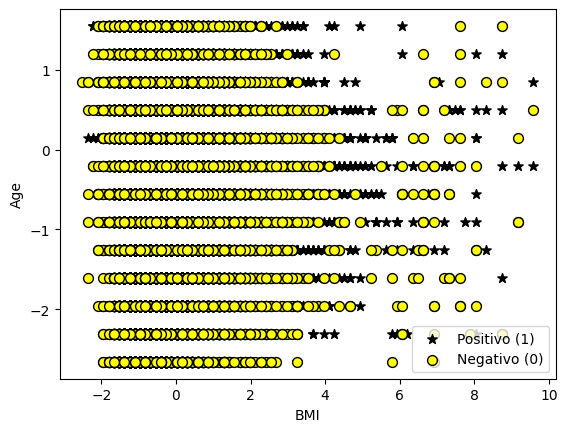

In [46]:
# Asumiendo que X es el DataFrame que contiene las características independientes
# y que y es la Serie de pandas con la variable dependiente (etiqueta)

from matplotlib import pyplot

# Vamos a seleccionar dos características que podrían ser significativas.

feature_1 = 'BMI'
feature_2 = 'Age'  

def plotData(X, y, feature_1, feature_2):
    # Crea una nueva figura
    fig = pyplot.figure()

    # Encuentra índices de ejemplos positivos y negativos
    pos = y == 1
    neg = y == 0

    # Grafica ejemplos utilizando 'loc' para indexar con una máscara booleana
    pyplot.scatter(X.loc[pos, feature_1], X.loc[pos, feature_2], c='black', marker='*', s=50)
    pyplot.scatter(X.loc[neg, feature_1], X.loc[neg, feature_2], c='yellow', marker='o', s=50, edgecolor='black')

    # Añade etiquetas y leyenda
    pyplot.xlabel(feature_1)
    pyplot.ylabel(feature_2)
    pyplot.legend(['Positivo (1)', 'Negativo (0)'])

# Llamando a la función implementada con los datos
plotData(X, y, feature_1, feature_2)

#### Implementación de la Función Sigmoidea


La función sigmoidea es esencial en la regresión logística, ya que transforma los valores de entrada en probabilidades entre 0 y 1.

In [47]:
import numpy as np

# Función Sigmoidea
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de `z`.

#### Prueba de la función

In [48]:
# Prueba la implementacion de la funcion sigmoide
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


### 1.2.2 Función de Costo y Gradiente

La función de costo y el descenso de gradiente son partes clave del aprendizaje del modelo. La función de costo calcula el error del modelo, y el descenso de gradiente ajusta los parámetros theta para minimizar este error.

In [49]:
# Agregar un término de intercepción a X_train
m, n = X_train.shape

X_train_with_intercept = np.concatenate([np.ones((m, 1)), X_train], axis=1)

In [50]:
def calcularCosto(theta, X, y):
    m = y.size  # numero de ejemplos de entrenamiento
    #h = sigmoid(X.dot(theta.T))
    #No debemos usar .T ya que estamos trabajando con un array 1D
    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [51]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        #h = sigmoid(X.dot(theta.T))
        h = sigmoid(X.dot(theta.T))

        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

#### Entrenamiento del Modelo y Visualización de la Convergencia

theta calculado por el descenso por el gradiente: [-3.94355997e-02  5.46456188e+00  1.98887525e-01  1.49998001e-01
  1.05533964e-01  2.35704215e-01 -2.00497700e-03  1.32451544e-02
  4.24539804e-02 -8.51749805e-03 -1.35796728e-02 -1.96823257e-02
 -7.70926287e-02  3.33171355e-03  2.05035605e-03  3.20459031e-01
 -2.05979357e-02 -3.38648004e-02  3.01276207e-02  6.83882161e-02
  2.14125241e-01 -1.65556037e-02 -6.41408881e-02]


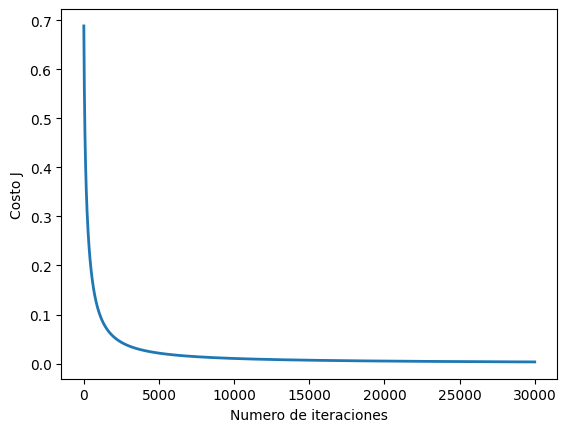

In [52]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 30000

# inicializa theta y ejecuta el descenso por el gradiente
initial_theta = np.zeros(n + 1)  # n es el número de características, agregamos 1 por el término de intercepción
theta, J_history = descensoGradiente(initial_theta, X_train_with_intercept, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

El gráfico de la función de costo muestra una rápida convergencia hacia un valor bajo de costo y se estabiliza, lo que indica que el modelo está aprendiendo adecuadamente.

#### Agregaumos un térimo de intercepación a X_test. 

In [53]:
# Agregar un término de intercepción a X_test (este debe ser el X_test escalado anteriormente)
X_test_with_intercept = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

print(X_test)
print(y_test)

       Diabetes_binary    HighBP  HighChol  CholCheck       BMI    Smoker  \
44967              1.0 -1.136104  0.949850   0.159276 -0.963885  1.050740   
20220             -1.0 -1.136104 -1.052798   0.159276  0.441813  1.050740   
23944             -1.0  0.880201  0.949850   0.159276 -0.401606  1.050740   
2707              -1.0 -1.136104  0.949850   0.159276 -0.120466  1.050740   
42356              1.0  0.880201 -1.052798   0.159276  2.409790 -0.951711   
...                ...       ...       ...        ...       ...       ...   
59313              1.0  0.880201 -1.052798   0.159276 -1.385594 -0.951711   
44805              1.0  0.880201  0.949850   0.159276 -0.401606 -0.951711   
30661             -1.0 -1.136104 -1.052798   0.159276 -0.261036 -0.951711   
30295             -1.0  0.880201  0.949850   0.159276 -1.526164 -0.951711   
30199             -1.0 -1.136104  0.949850   0.159276  0.160673  1.050740   

         Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
44967

#### Realizar las predicciones con el modelo entrenado

In [77]:
probabilidades = sigmoid(np.dot(X_test_with_intercept, theta))
# Umbral de 0.001
predicciones = probabilidades >= 0.001

#### Evaluación del modelo:

In [78]:
# Calcular la precisión
precision = np.mean(predicciones == y_test)
print(f'Precisión en el conjunto de prueba: {precision * 100:.2f}%')

Precisión en el conjunto de prueba: 53.78%


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entrenar un modelo con Scikit-learn
model = LogisticRegression(solver='lbfgs', max_iter=300)
model.fit(X_train, y_train)

# Calcular la precisión
precision_sklearn = accuracy_score(y_test, predicciones)
print(f'Precisión con Scikit-learn: {precision_sklearn * 100:.2f}%')

Precisión con Scikit-learn: 100.00%
